# Aprendizado Supervisionado

## Árvore de Decisão

Na primeira parte do curso apresentamos dois algoritmos clássicos de aprendizagem de máquina: o KNN e o algoritmo de regressão linear. O primeiro é voltado para o problema de classificação e o segundo para o de regressão. 

Neste tutorial, vamos explorar mais uma técnica para o problema de classificação. Para isso, vamos trabalhar com a árvore de devisão.

Nas árvores de decisão, o problema de aprendizado de máquina é visto com um problema de busca em um espaço de possíveis soluções. Este método faz uso da estratégia dividir para conquistar. A idéia básica é dividir um problema maior em problemas mais simples, aos quais são aplicadas, recursivamente, a mesma estratégia anterior. As soluções dos subproblemas podem ser combinadas, na forma de uma árvore, para produzir uma solução do problema complexo. A força dessa proposta vem da capacidade de dividir o espaço de instâncias em subespaços e cada subespaço é ajustado usando diferentes modelos. Essa é a idéia básica por trás dos principais algoritmos de ávore de decisão, tais como: ID3, ASSITANT, CART, C4.5.

A imagem a seguir mostra um exemplo de árvore de decisão e as regiões de decisão dentro do espaço de soluções definidos pelos atributos $x_1$ e $x_2$.

<img src="http://www.data2learning.com/machinelearning/images_notebook/print_arvores_decisao.png" width="70%">

Cada nó da árvore corresponde a uma região no espaço de decisão que foi definido pelos atributos. É importante ressaltar que as regiões nesse espaço são mutuamente excludentes, e a reunião delas compõe todo o espaço definido pelos atributos. A árvore de decisão consegue abranger todo o espaço de instâncias. Isso implica que uma árvore de decisão é capaz de fazer predição para qualquer exemplo de entrada.

## Algoritmo para construção da árvore de decisão

A imagem a seguir mostra, de forma geral, o algoritmo para gerar uma árvore de decisão:

<img src="http://www.data2learning.com/machinelearning/images_notebook/arvoredecisao_03.png" width="70%">

O algoritmo para a construção da árvore de decisão consiste em escolher os atributos que melhor separam os dados. O ideal é que o primeiro atributo seja aquele que quando selecionado já consiga classificar o maior número de instâncias possível. Para isto, vamos calcular, para cada atributo, o que chamamos de **ganho de informação (GI)**. O GI mede a efetividade de um atributo em classificar um conjunto de treinamento. Em outras palavras, permite avaliar o quão bom um atributo é para classificar este conjunto.

O Ganho de Informação é dado pela seguinte equação: 

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$, 

onde E é a entropia dada por: 

$E = \sum_{i}^{c}{-p_i\log_2{p_i}}$

A **entropia** mede o nível de incerteza que temos sobre um determinado evento. $S$ é o conjunto de dados que estamos considerando na análise do GI do atributo $A$.

Para ilustrar, considere um evento qualquer que possui 14 exemplos ($S$). Destes exemplos, 9 são positivos e 5 são negativos. A entropia desse conjunto é dada por:

$E(S) = -\frac{9}{14}\log_2{\frac{9}{14}} - \frac{5}{14}\log_2{\frac{5}{14}} = 0.94$

E se tivéssemos 7 instâncias positivas e 7 negativas ([7+, 7-]):

$E(S) = -\frac{7}{14}\log_2{\frac{7}{14}} - \frac{7}{14}\log_2{\frac{7}{14}} = 0.999... \approx 1$

E para [0+,14-] ou [14+, 0-]:

$E(S) = -\frac{14}{14}\log_2{\frac{14}{14}} = 0$

Entropia 0 significa nenhum grau de incerteza. Já a entropia 1 significa alto grau de incerteza. 

O cálculo do GI está relacionado com a Entropia. Na verdade, GI é a redução da entropia, causada pelo particionamento de exemplos de acordo com este atributo. Quanto maior a **redução da entropia** melhor o atributo. Em outras palavras, quando maior a redução melhor a "qualidade" daquele atributo em separar o conjunto de dados.  

### Exemplo 1

Considere um conjunto de treinamento $S$ que possui o atributo **Vento** (que pode receber dois valores: Forte ou Fraco). Considere também que $S$ possui 9 instâncias positivas e 5 instâncias negativas (classe para classificação). Considere também que 6 dos exemplos positivos e 2 dos exemplos negativos são associados a vento Fraco. Além disso, 3 exemplos negativos e 3 exemplos positivos estão associados a vento Forte. 

Pretende-se calcular o ganho de informação ao selecionar o valor atributo Vento para a raiz de uma árvore de decisão. Vejamos como é feito o cálculo, utilizando as definições matemáticas apresentadas anteriormente.

**Cálculo**

O conjunto S está dividido da seguinte forma: $S = [9+, 5-]$ e a divisão de acordo com o atributo é dada por:

$S_{fraco} \leftarrow [6+, 2-]$

$S_{forte} \leftarrow [3+, 3-]$

Sabendo que o cálculo do GI é dado por: 

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$, 

onde S é o conjunto de treinamento que vai ser dividido e A é o atributo a ser considerado. 

O primeiro passo é calcular E(S).

$E(S) = -\frac{9}{14}\log_2{\frac{9}{14}} - \frac{5}{14}\log_2{\frac{5}{14}} = 0.940$

Agora vamos trabalhar com os atributos: 

O atributo Vento possui dois valores: Forte e Fraco. Devemos calcular a entropia para cada um desses atributos: 

$E(S_{fraco}) = -\frac{2}{8}\log_2{\frac{2}{8}} - \frac{6}{8}\log_2{\frac{6}{8}} = 0.811$

$E(S_{forte}) = -\frac{3}{6}\log_2{\frac{3}{6}} - \frac{3}{6}\log_2{\frac{3}{6}} = 1$

Com isso podemos calcular: 

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$- \frac{8}{14}*0.811 - \frac{6}{14}*1 = -0.892$

Por fim, temos que  o Ganho de Informação é: 

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = 0.940 - 0.892 = 0.048$

Essa valor significa que selecionar esse atributo reduz muito pouco o nível de incerteza que tínhamos. Sendo assim, ele não é um atributo muito bom para ser selecionado. No entanto, essa análise deve ter como base o ganho de informação dos demais atributos da base. Vamo ver como fazer isso a seguir. 

## Construindo uma árvore de decisão

Exemplo retirado de: http://conteudo.icmc.usp.br/pessoas/mello/courses/scc5879-aula05.pdf

Vamos considerar o seguinte dataset:

In [2]:
from sklearn import tree
import pandas as pd

data = pd.read_csv('http://www.data2learning.com/machinelearning/datasets/exemplo_jogar.csv')

data

,Panorama,Temperatura,Umidade,Vento,Jogar
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Intermediária,Alta,Fraco,Sim
4,Chuvoso,Fria,Normal,Fraco,Sim
5,Chuvoso,Fria,Normal,Forte,Não
6,Nublado,Fria,Normal,Forte,Sim
7,Ensolarado,Intermediária,Alta,Fraco,Não
8,Ensolarado,Fria,Normal,Fraco,Sim
9,Chuvoso,Intermediária,Normal,Fraco,Sim


O dataset possui 4 atributos: (1) Panorama, (2) Temperatura, (3) Umidade e (4) Vento. A classe é o atributo *Jogar*. A tarefa de classificação consiste em dado um panorama sobre o clima, devemos jogar ou não jogar tênis. Para a construção da árvore de decisão, o primeiro passo é escolher qual atributo será colocado na raiz da árvore. Dentre os atribuitos, o ideal é que seja escolhido sempre aquele que possui o maior ganho de informação. Vamos calcular GI para cada um dos atributos.

### Atributo Vento [Forte, Fraco]

O grau de informação do atributo vento já foi calculado no exemplo anterior. O valor dele é **0.048**. Já sabemos que ele não é um bom atributo, mas só descartamos a escolha deste quando fizermos a comparação de seu valor com o GI dos demais atributos.

### Atributo Panorama [Ensolarado, Nublado, Chuvoso]

O atributo panorama está dividido da seguinte forma na base de treinamento: 

* Ensolarado: $\frac{5}{14}$ onde $[2+, 3-]$ 


* Nublado: $\frac{4}{14}$ onde $[4+, 0-]$


* Chuvoso: $\frac{5}{14}$ onde $[3+, 2-]$ 

Vamos calcular a entropia e o ganho de informação de cada atributo:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{5}{14}*E(S_{Ensolarado}) - \frac{4}{14}*E(S_{Nublado}) - 
\frac{5}{14}*E(S_{Chuvoso})$

Calculando a entropia de cada atributo temos:

$E(S_{Ensolarado}) = - \frac{2}{5}*log_2{\frac{2}{5}} - \frac{3}{5}*log_2{\frac{3}{5}} = 0.971$

$E(S_{Nublado}) = - \frac{4}{4}*log_2{\frac{4}{4}} - \frac{0}{4}*log_2{\frac{0}{4}} = 0$

$E(S_{Chuvoso}) = - \frac{3}{5}*log_2{\frac{3}{5}} - \frac{2}{5}*log_2{\frac{2}{5}} = 0.971$

Calculando o ganho de informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{5}{14}*E(S_{Ensolarado}) - \frac{4}{14}*E(S_{Nublado}) - 
\frac{5}{14}*E(S_{Chuvoso})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{5}{14}*0.971 - \frac{4}{14}*0 - \frac{5}{14}*0.971 = -0.693$

Por fim, temos que o GI de informação para o atributo **Panorama** é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.940 - 0.693 = 0.247$

**Até o momento, temos: **

$GI(Vento) = 0.048$

$GI(Panorama) = 0.247$

E o atributo **temperatura**?

E o atributo **umidade**?

Devemos fazer o mesmo processo para estes atributos. 

### O Atributo Umidade [Alta, Normal]

O atributo umidade está dividido da seguinte forma na base de treinamento: 

* Alta: $\frac{7}{14}$ onde $[3+, 4-]$ 


* Normal: $\frac{7}{14}$ onde $[6+, 1-]$

Vamos calcular:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{7}{14}*E(S_{Alta}) - \frac{7}{14}*E(S_{Normal})$

Calculando a entropia de cada atributo temos:

$E(S_{Alta}) = - \frac{3}{7}*log_2{\frac{3}{7}} - \frac{4}{7}*log_2{\frac{4}{7}} = 0.985$

$E(S_{Normal}) = - \frac{6}{7}*log_2{\frac{6}{7}} - \frac{1}{7}*log_2{\frac{1}{7}} = 0.591$


Agora podemos calcular o ganho de informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{7}{14}*E(S_{Alta}) - \frac{7}{14}*E(S_{Normal})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{7}{14}*0.985 - \frac{7}{14}*0.591 = -0.788$

Por fim, temos que o GI de informação para o atributo Umidade é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.940 - 0.788 = 0.152$

### Atributo Temperatura [Quente, Intermediária, Fria]

O atributo Temperatura está dividido da seguinte forma na base de treinamento: 

* Quente: $\frac{4}{14}$ onde $[2+, 2-]$ 


* Intermediária: $\frac{6}{14}$ onde $[4+, 2-]$


* Fria: $\frac{4}{14}$ onde $[3+, 1-]$ 

Vamos calcular:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{4}{14}*E(S_{Quente}) - \frac{6}{14}*E(S_{Intermediaria}) - 
\frac{4}{14}*E(S_{Fria})$

Calculando a entropia de cada atributo temos:

$E(S_{Quente}) = - \frac{2}{4}*log_2{\frac{2}{4}} - \frac{2}{4}*log_2{\frac{2}{4}} = 1$

$E(S_{Intermediaria}) = - \frac{4}{6}*log_2{\frac{4}{6}} - \frac{2}{6}*log_2{\frac{2}{6}} = 0.918$

$E(S_{Fria}) = - \frac{3}{4}*log_2{\frac{3}{4}} - \frac{1}{4}*log_2{\frac{1}{4}} = 0.811$

Agora podemos calcular o ganho de informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{4}{14}*E(S_{Quente}) - \frac{6}{14}*E(S_{Intermediaria}) - 
\frac{4}{14}*E(S_{Fria})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{4}{14}*1 - \frac{6}{14}*0.918 - \frac{4}{14}*0.811 = -0.910$

Por fim, temos que o GI de informação para o atributo Temperatura é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.940 - 0.910 = 0.030$

Dessa forma, já temos a análise dos 4 atributos: 

$GI(S, Panorama) = 0.247$

$GI(S, Umidade) = 0.152$

$GI(S, Vento) = 0.048$

$GI(S, Temperatura) = 0.03$

Dos 4 atributos, devemos selecionar aquele que proporciona um maior ganho de informação. Neste caso, escolhemos o atributo **Panorama**. Ele é que deve ser a raiz da árvore. 

<img src="http://www.data2learning.com/machinelearning/images_notebook/arvoredecisao_01.png">

Observe que com a escolha desse atributo já conseguimos classificar um conjunto de dados da base de treinamento. Se o panorama for Nublado, sempre jogará tênis. No entanto, ainda não temos certeza quando o panorama for ensolarado ou chuvoso. Nestes casos, devemos analisar novamente os atributos do conjunto de treinamento para decidir qual atributo devemos escolher para os nós ensolarado e chuvoso. Para este cálculo, o atributo Panorama não entra na computação do Ganho de Informação.

O processo de cálculo é o mesmo. No entanto, seu conjunto *S* muda. *S* passa ser agora, no caso de ensolarado, $ S = {D1, D2, D8, D9, D11}$ que são divididos em $[2+, 3-]$. No caso de chuvoso, o conjunto *S* passa a ser $S = {D4, D5, D6, D10, D14}$ que são divididos em $[3+, 2-]$.

Vamos trabalhar com o caso *Ensolarado*.

O primeiro passo é calcular a entropia de S ($E(S)$):

$E = \sum_{i}^{c}{-p_i\log_2{p_i}} = -\frac{2}{5}*\log_2{\frac{2}{5}} - \frac{3}{5}*\log_2{\frac{3}{5}} = 0.971$

Com o valor da Entropia de $S$, calculamos o $GI$ para cada um dos atributos restantes: Umidade, Temperatura e Vento.

### O Atributo Umidade [Alta, Normal]

O atributo umidade está dividido da seguinte forma na base de treinamento: 

* Alta: $\frac{3}{5}$ onde $[0+, 3-]$ 


* Normal: $\frac{2}{5}$ onde $[2+, 0-]$


Vamos calcular:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{3}{5}*E(S_{Alta}) - \frac{2}{5}*E(S_{Normal})$

Calculando a entropia de cada atributo temos:

$E(S_{Alta}) = - \frac{0}{3}*log_2{\frac{0}{3}} - \frac{3}{3}*log_2{\frac{3}{3}} = 0$

$E(S_{Normal}) = - \frac{2}{2}*log_2{\frac{2}{2}} - \frac{0}{2}*log_2{\frac{0}{2}} = 0$


Agora podemos calcular o Ganho de Informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{3}{5}*E(S_{Alta}) - \frac{3}{5}*E(S_{Normal})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{3}{5}*0 - \frac{3}{5}*0 = 0$

Por fim, temos que o GI de informação para o atributo Umidade é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.971 - 0 = 0.971$

### Atributo Temperatura [Quente, Intermediária, Fria]

O atributo Temperatura está dividido da seguinte forma na base de treinamento: 

* Quente: $\frac{2}{5}$ onde $[0+, 2-]$ 


* Intermediária: $\frac{2}{5}$ onde $[1+, 1-]$


* Fria: $\frac{1}{5}$ onde $[1+, 0-]$ 

É fácil definir as entropiais individiuais:

$E_(S_{Quente}) = 0$

$E_(S_{Intermediaria}) = 1$

$E_(S_{Fria}) = 0$

Vamos calcular o Ganho de Informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{2}{5}*E(S_{Quente}) - \frac{2}{5}*E(S_{Intermediaria}) - 
\frac{1}{5}*E(S_{Fria})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{2}{5}*0 - \frac{2}{5}*1 - \frac{1}{5}*0 = -0.4$

Por fim, temos que o GI de informação para o atributo Temperatura é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.971 - 0.4 = 0.571$

### Atributo Vento [Fraco, Forte]

O atributo Vento está dividido da seguinte forma na base de treinamento: 

* Fraco: $\frac{3}{5}$ onde $[1+, 2-]$ 


* Forte: $\frac{2}{5}$ onde $[1+, 1-]$

É fácil definir as entropiais individiuais:

$E_(S_{Fraco}) = 0.918$

$E_(S_{Forte}) = 1$

Vamos calcular o Ganho de Informação:

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{3}{5}*E(S_{Quente}) - \frac{2}{5}*E(S_{Intermediaria})$

$- \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)} = -\frac{3}{5}*0.918 - \frac{2}{5}*1 = -0.951$

Por fim, temos que o GI de informação para o atributo Vento é:

$GI(S,A) = E(S) - \sum_{v \in Valores(A)}{\frac{S_v}{S}E(S_v)}$

$GI(S,A) = 0.971 - 0.950 = 0.020$

Dessa forma, já temos a análise dos 3 atributos restantes: 

$GI(S, Umidade) = 0.971$

$GI(S, Vento) = 0.571$

$GI(S, Temperatura) = 0.020$

Dos 3 atributos, devemos selecionar aquele que proporciona um maior ganho de informação. Neste caso, escolhemos o atributo **Umidade**. Ele é que deve ser o atributo quando ensolarado. 

<img src="http://www.data2learning.com/machinelearning/images_notebook/arvoredecisao_02.png">

E no caso do ramo **Chuvoso**, como fica a separação? Essa tarefa será passada como atividade desta aula.

O exemplo estudado foi para atributos categorizados. No entanto, podemos trabalhar árvores de decisão com base de dados onde os atributos são contínuos. Neste caso, a forma de cálculo do Ganho de Informação muda. Neste material, irei focar a parte teórica somente em atributos categóricos. Mais detalhes de como utilizar com atributos contínuos podem ser encotnrados no material de referência citado no início do curso.

## Implementando a árvore de decisão no Scikit Learn

Existem diversos algoritmos para implementação da árvore de decisão: ID3, ASSISTANT, CART, C5.0, C4.5 entre outros. Segundo a documentação do scikit-learn, *scikit-learn uses an optimised version of the CART algorithm*. A própria documentação apresenta a definição de alguns destes algoritmos. 


> **ID3 (Iterative Dichotomiser 3)** was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.
>
> **C4.5** is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.
>
> **C5.0** is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.
>
> **CART (Classification and Regression Trees)** is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

No nosso estudo prático, vamos nos focar mais na utilização deste modelo e mudanças de alguns atributos com a finalidade de melhorar os modelos construídos. 

O primeiro passo é preparar a nossa base de dados. Vamos trabalhar no primeiro exemplo com a base do exemplo de Jogar Tênis. Essa base trabalha com valores dos atributos em texto. No entanto, o scikit learn trabalhar apenas com valores numéricos para os atributos e classes. O código a seguir faz o pré-processamento da base. 

Como foi dito anteriormente, a explicação dos métodos utilizados para processar estas bases fogem do escopo deste material. 

Para quem quiser mais detalhes do processo utilizado nesta etapa, visite [este link](http://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)

In [5]:
from sklearn import preprocessing

#Ler a base de dados
data = pd.read_csv('http://www.data2learning.com/machinelearning/datasets/exemplo_jogar.csv')

# O pacote preprocessing possui o método LabelEncoder que faz a transformação automática dos atributos textuais em
# valores numéricos.
le_P = preprocessing.LabelEncoder() # Panorama
le_T = preprocessing.LabelEncoder() # Temperatura
le_U = preprocessing.LabelEncoder() # Umidade
le_V = preprocessing.LabelEncoder() # Vento
le_J = preprocessing.LabelEncoder() # Jogar

# Transforma os atributos de string em numéricos. Os números são atribuídos de acordo com a posição do label 
# na lista que está sendo impressa.
data.Panorama = le_P.fit_transform(data.Panorama)
print("Valores para o atributo Panorama: ", list(le_P.classes_))

data.Temperatura = le_T.fit_transform(data.Temperatura)
print("Valores para o atributo Temperatura: ", list(le_T.classes_))

data.Umidade = le_U.fit_transform(data.Umidade)
print("Valores para o atributo Umidade: ", list(le_U.classes_))

data.Vento = le_V.fit_transform(data.Vento)
print("Valores para o atributo Vento: ", list(le_V.classes_))

data.Jogar = le_J.fit_transform(data.Jogar)
print("Valores para o atributo Jogar: ", list(le_J.classes_))

data

Valores para o atributo Panorama:  ['Chuvoso', 'Ensolarado', 'Nublado']
Valores para o atributo Temperatura:  ['Fria', 'Intermediária', 'Quente']
Valores para o atributo Umidade:  ['Alta', 'Normal']
Valores para o atributo Vento:  ['Forte', 'Fraco']
Valores para o atributo Jogar:  ['Não', 'Sim']


,Panorama,Temperatura,Umidade,Vento,Jogar
0,1,2,0,1,0
1,1,2,0,0,0
2,2,2,0,1,1
3,0,1,0,1,1
4,0,0,1,1,1
5,0,0,1,0,0
6,2,0,1,0,1
7,1,1,0,1,0
8,1,0,1,1,1
9,0,1,1,1,1


In [6]:
# Criando X e Y

feature_columns = ['Panorama','Temperatura','Umidade','Vento']

X = data[feature_columns]
y = data.Jogar

Os algoritmos de aprendizagem baseados em árvores é implementado no pacote [**tree**](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) do scikit-learn. Vamos utilizar o [**DecisionTreeClassifier**](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

O atribuito ***criterion*** passado como parâmetro indica qual métrica será utilizada para avaliar a qualidade da divisão. O critério ganho de informação é identificado por **entropy**.

In [7]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(criterion='entropy')
clf_tree = clf_tree.fit(X,y)

Podemos gerar uma imagem que representa a árvore de decisão criada a partir da função a seguir.

In [8]:
from IPython.display import Image  
import pydotplus


def print_tree(classifier, fn, cn):
    dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=fn,  
                         class_names=cn,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data) 
    return graph.create_png()

A árvore criada não é a mesma criada manualmente porque o scikit-learn trabalhar com dados numéricos. A árvore que criamos manualmente trabalhar com dados categóricos.

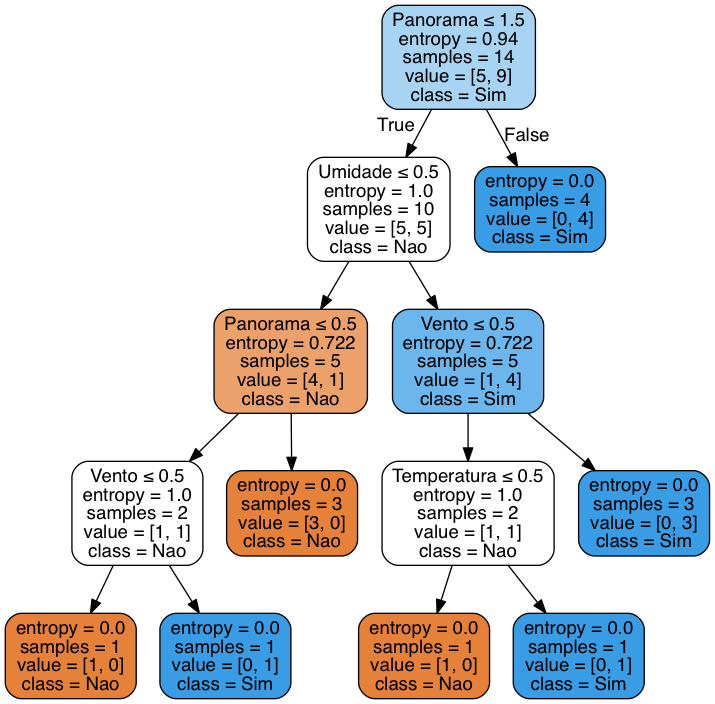

In [9]:
img_png = print_tree(clf_tree, feature_columns, ['Nao','Sim'])
Image(img_png, width=500)

## Aplicando a árvore de decisão na base da Iris

O exemplo anterior foi só para mostrar como podemos construir manualmente a árvore de decisão. Vamos trabalhar agora com uma base mais completa já vista anteriormente: a base Iris. O propósito é treinarmos o modelo e analisar a acurácia deste utilizando a validação cruzada. 

In [10]:
# Importando a base da Iris
from sklearn.datasets import load_iris

dataset_iris = load_iris()

X = dataset_iris.data
y = dataset_iris.target

Vamos fazer o treinamento usando validação cruzada com 5 folds. Em seguida vamos imprimir a acurácia na base de treino (a média dos 5 folds).

In [12]:
# Aplicando a validação cruzada na base
from sklearn.model_selection import cross_val_score

clf_tree = tree.DecisionTreeClassifier(criterion='entropy')

clf_tree = clf_tree.fit(X, y)

scores = cross_val_score(clf_tree, X, y, cv=5, scoring='accuracy')

print("Acurácia da Ávore de Decisão: ", scores.mean())

Acurácia da Ávore de Decisão:  0.9533333333333334


Imprimindo a árvore treinada.

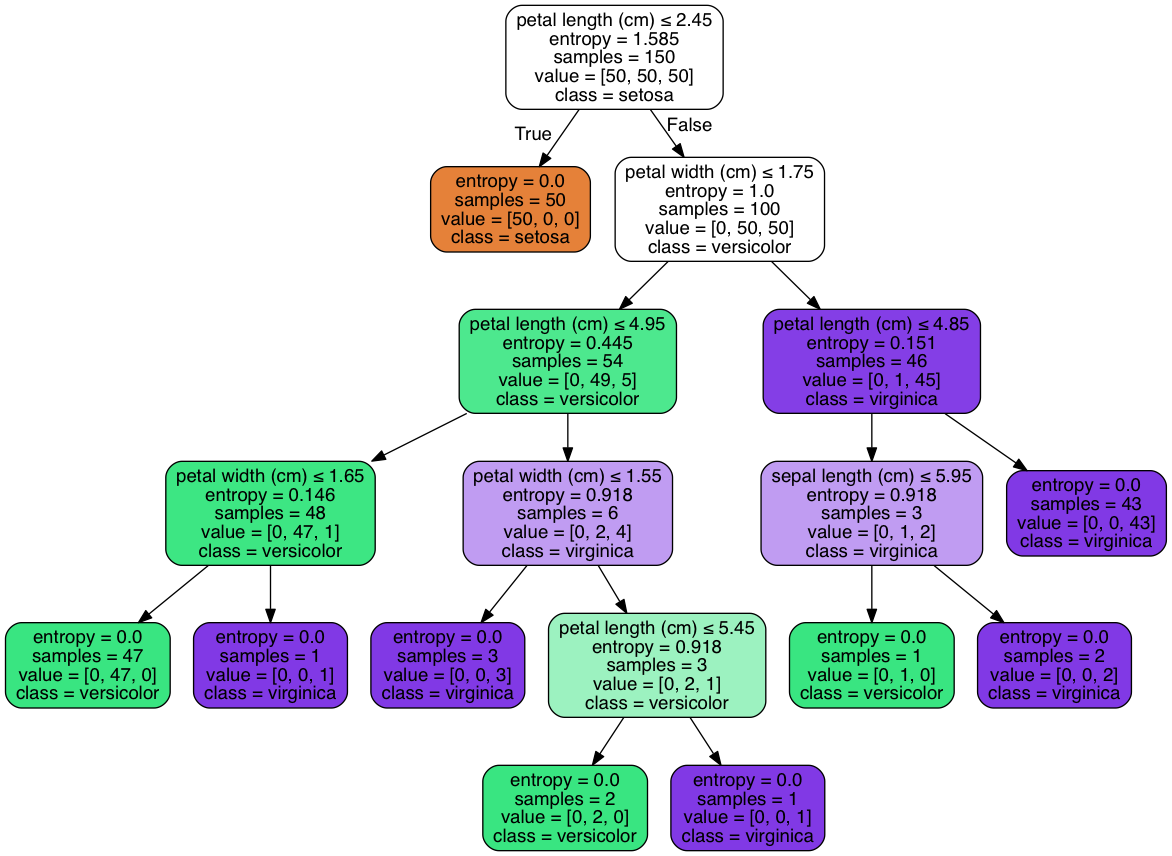

In [13]:
tree_png = print_tree(clf_tree, dataset_iris.feature_names, dataset_iris.target_names)
Image(tree_png, width=800)

## Entendendo melhor as árvores de decisão

Uma descrição completa de como funciona árvore de decisão pode ser encontrada [neste link](http://scikit-learn.org/stable/modules/tree.html#tree)

Uma outra explicação sobre árvores de decisão pode ser encontrada [neste link](ftp://ftp.dca.fee.unicamp.br/pub/docs/vonzuben/ia004_1s10/notas_de_aula/topico7_IA004_1s10.pdf) também.

Vamos discutir alguns aspectos:

### Poda da Árvore

Na construção da árvore de decisão, arestas ou sub-árvores podem representar ruídos ou erros presente na base de dados. Isso implica em dois problemas: (1) redução na generalização do modelo (classificar novos objetos de forma não tão precisa), que consequentemente reflete uma superajuste do modelo na base de treinamento; (2) implica em uma árvore grande e difícil de ser interpretada. Uma solução para minimizar esses problemas é realizar a **poda** da árvore. Podar uma árvore consiste em trocar nós profundos por folhas. 

É fácil perceber que essa ação vai gerar um modelo que erra mais na base de treinamento. No entanto, isso pode ter um efeito positivo na generalização e, consequentemente, um aumento na classificação de instâncias desconhecidas.

Os métodos de poda podem ser classificados em dois grupos: (1) pré-poda e (2) pós-poda. O primeiro a construção da árvore é interrompida até um determinado critério ser atingido. O ganho de informação pode ser um destes critérios. O segundo, a poda é realizada após a construção de toda árvore. Esse segundo é o mais comum e menos complexo de ser realizado. Neste caso, uma árvore superajustada aos dados de treinamento é gerada e podada em seguida. Apesar de ser mais lento, construir uma árvore e depois podar, esse método é mais confiável se comparado com os métodos pré-poda.

De forma geral, o processo de pós-poda pode ser descrito da seguite forma (retirado [deste link](ftp://ftp.dca.fee.unicamp.br/pub/docs/vonzuben/ia004_1s10/notas_de_aula/topico7_IA004_1s10.pdf)):

> * Para cada nó interno da árvore, o algoritmo calcula a taxa de erro caso a sub-árvore abaixo desse nó seja podada. Em seguida, é calculada a taxa de erro caso não haja a poda. Se a diferença entre essas duas taxas de erro for menor que um valor pré- estabelecido, a árvore é podada. Caso contrário, não ocorre a poda.
> * Esse processo se repete progressivamente, gerando um conjunto de árvores podadas. Por fim, para cada uma delas é calculada a acurácia na classificação de um conjunto de dados independente dos dados de treinamento (por exemplo, o conjunto de validação), e a árvore que obtiver a melhor acurácia será a escolhida. 

Um cuidado que se deve ter com o processo de poda da ávore é não podar a ávore de mais e ter o problema inverso ao de sobreajuste: deixar o modelo sub-ajustado. Em outras palavras, o modelo não consegue aprender suficientemente a partir dos dados de treinamento gerando baixíssimos índices de acerto.  Sendo assim, o processo de poda deve ser feito com cuidado e de forma experimental. 

### No sciki-learn, 

o atributo que permite determinar a profundidade de uma árvore é: `max_depth`. Segundo a documentação:

```
max_depth : int or None, optional (default=None)

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
```

Outros atributos permitem controlar com a árvore de decisão é formada. Apesar de não está relacionado diretamente com a profundidade da árvore, os atributos a seguir permitem ajustar como será realizada a divisão da árvore.

```
min_samples_split : int, float, optional (default=2)

The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
Changed in version 0.18: Added float values for percentages.

min_samples_leaf : int, float, optional (default=1)

The minimum number of samples required to be at a leaf node:

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
```


Podemos mexer nestes parâmetros e verificar novos valores de acurácia. Esse valores podem ser alterados em busca do melhor modelo. 

In [48]:
# Aplicando a validação cruzada na base
from sklearn.model_selection import cross_val_score

clf_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=5, min_samples_leaf=1)

clf_tree = clf_tree.fit(X, y)

scores = cross_val_score(clf_tree, X, y, cv=5, scoring='accuracy')

print("Acurácia da Ávore de Decisão: ", scores.mean())

Acurácia da Ávore de Decisão:  0.96


### Algoritmos de Árvore de Decisão

Como dito anteriormente, existem vários algoritmos de árvore de decisão. Dentre os mais citados na literatura, temos: ID3, o C4.5 (para quem usa o Weka, esse algoritmo é referenciado como J48) e o CART (o scikit-learn implementa uma versão deste algoritmo). Vamos ver algumas características destes algoritmos (retirado [deste link](ftp://ftp.dca.fee.unicamp.br/pub/docs/vonzuben/ia004_1s10/notas_de_aula/topico7_IA004_1s10.pdf)): 

* ID3
    * Um dos primeiros algoritmos. 
    * Baseia-se em busca gulosa: busca no conjunto de atributos aquele que melhor separa o conjunto de dados.
    * Só lida com atributos categóricos não-ordinais.
    * Não trata valores desconhecidos. Assume que os dados de treinamento estão todos definidos na base. Caso não esteja, deve-se gastar tempo de pré-processamento para garantir isto. 
    * Não apresenta solução para pós-poda.


* C45
    * É uma evolução do ID3.
    * Lida com atributos categóricos (ordinário e não-ordinário) assim como atributos contíguos. 
    * Trata valores desconhecidos.
    * Apresenta uma método de pós-poda das árvores geradas.
    * É um dos mais utilizados pelos bons resultados obtidos.
    * Utiliza uma abordagem guloso e dividar para conquistar.
    
    
* CART
    * Induz tantos árvores de classificação quanto de regressão.
    * Tem uma grande capacidade de pesquisa de relação entre os dados.
    * Produz árvores de grande simplicidade e legibilidade.
    * As árvores geradas são sempre binárias.
    * Realiza pós-poda de forma bem eficiente gerando ávores simples e de boa generalização.

### Árvores de Decisão para Regressão

As árvores de decisão também podem ser utilizadas para o problema da regressão. O scikit-learn possui a classe `DecisionTreeRegressor` que aplica este modelo para os problemas de regressão. Detalhes podem ser encontrados na [documentação do scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).

Com isso fechamos esse tutorial de Árvore de Decisão. Nos execícios correspondentes vamos explorar um pouco mais como utilizar a árvore de decisão e comparar o seu resultado com outros classificadores.

**Até o próximo tutorial ;)**